# 机器学习工程师纳米学位 
## 简介和基础知识
## 项目：探索泰坦尼克号乘客存活情况

在 1912 年，泰坦尼克号巨轮在首次出航时撞上了冰山并沉落到海底，乘客和船员几乎无一幸免。在此引导项目中，我们将研究一小部分泰坦尼克号乘客名单，判断哪些特征最适合预测乘客是否存活下来。要完成此项目，你需要实现几个条件预测并回答下面的问题。我们将根据你的代码完成情况和问题答案评估你提交的项目。
> **提示：**类似于此部分的引用部分可以提供关于如何浏览和使用 iPython notebook 的实用说明。

# 开始
要开始处理泰坦尼克号乘客数据，我们首先需要  `import` 所需的功能，并将数据导入 pandas` DataFrame。  
运行以下代码单元格，加载我们的数据并使用 `.head()` 函数显示前几个条目（乘客）以进行检查。
> **提示：**你可以通过点击单元格和使用键盘快捷键 **Shift + Enter** 或 **Shift + Return** 运行代码单元格。此外，在选中单元格后还可以使用工具栏中的**播放**按钮执行代码单元格。双击 Markdown 单元格（如下所示的文本单元格）即可进行编辑，并使用相同的快捷键保存。[Markdown](http://daringfireball.net/projects/markdown/syntax) 使你能够编写易于阅读的纯文本文件，这些文件可以转换为 HTML。

In [1]:
!ls

project_description.md	README.md	  titanic.ipynb		     visuals.py
__pycache__		titanic_data.csv  titanic_survival-zh.ipynb


## 数据样本

In [2]:
#数据分析库
import pandas as pd
#科学计算库
import numpy as np

data = pd.read_csv("titanic_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


此项目数据库包含数据集titanic_data.csv.共计 **891** 条数据，其中**Age**、**Cabin**、**Embarked**字段存在数据缺失


## 数据特征
| 字段 | 类型 | 字段说明 |
| ------ | ------ | ------ |
| PassengerId  | int64 | 乘客编号 |
| Survived    | int64 |存活情况（存活：1 ; 死亡：0） |
| Pclass | int64 | 客舱等级 |
| Name | object | 乘客姓名 |
| Sex |object| 性别 |
| Age | float64 | 年龄 **缺失数据** |
| SibSp | int64 | 同乘的兄弟姐妹/配偶数 |
| Parch | int64 | 同乘的父母/小孩数 |
| Ticket | object | 船票编号 |
| Fare | float64 | 船票价格 **缺失数据** |
| Cabin  | object | 客舱号 |
| Embarked  | object | 登船港口 **缺失数据** |

PassengerId 是数据唯一序号；Survived是存活情况，为预测目标字段；其他10个字段为特征数据 

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


mean字段告诉我们，大概0.383838的人最后获救了，2/3等舱的人数比1等舱要多，平均乘客年龄大概是29.7等等

## 特征选取

In [6]:
#### 数据空值处理

print('处理前：')
data.info()
#年龄(Age)
data['Age']=data['Age'].fillna( data['Age'].mean() )
print('处理红后：')
data.info()


处理前：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
处理红后：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-

In [7]:
data['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [8]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
data['Embarked'] = data['Embarked'].fillna( 'S' )

In [10]:
#缺失数据比较多，船舱号（Cabin）缺失值填充为U，表示未知（Uknow） 
data['Cabin'] = data['Cabin'].fillna( 'U' )
#检查数据处理是否正常
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
sex_mapDict={'male':1,
            'female':0}
#map函数：对Series每个数据应用自定义的函数计算
data['Sex']=data['Sex'].map(sex_mapDict)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


In [13]:
#存放提取后的特征
embarkedDf = pd.DataFrame()
embarkedDf = pd.get_dummies( data['Embarked'] , prefix='Embarked' )
embarkedDf.head()
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
full = pd.concat([data,embarkedDf],axis=1)
full.drop('Embarked',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,0,0,1


In [14]:
#相关性矩阵
corrDf = full.corr() 
corrDf
'''
查看各个特征与生成情况（Survived）的相关系数，
ascending=False表示按降序排列
'''
corrDf['Survived'].sort_values(ascending =False)

Survived       1.000000
Fare           0.257307
Embarked_C     0.168240
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked_S    -0.149683
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrDf, vmax=.8, square=True, ax=ax)
plt.show()


## 构建模型 

用训练数据和机器学习算法得到最有机器学习模型，使用验证数据检验所选的模型，最后再用测试数据评估模型的的效果。

**建立训练数据集和测试数据集**



In [26]:
full_data= pd.concat( 
    [full['Survived'],#存活率
     full['Fare'],#头衔
                     full['Age'],#船舱号
                     full['Parch'],#登船港口
                     full['Sex'],#性别
                     full['Pclass'],
                     full['Embarked_S'],
                     full['Embarked_C']] , axis=1 )
full_data.head()

,Survived,Fare,Age,Parch,Sex,Pclass,Embarked_S,Embarked_C
0,0,7.2500,22.0,0,1,3,1,0
1,1,71.2833,38.0,0,0,1,0,1
2,1,7.9250,26.0,0,0,3,1,0
3,1,53.1000,35.0,0,0,1,1,0
4,0,8.0500,35.0,0,1,3,1,0


In [35]:
from sklearn.model_selection import train_test_split
X,y = full_data.iloc[:,1:].values,full_data.iloc[:,0].values
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=10)

In [36]:
#输出数据集大小
print ('原始数据集特征：',X.shape, 
       '训练数据集特征：',train_X.shape ,
      '测试数据集特征：',test_X.shape)

print ('原始数据集标签：',y.shape, 
       '训练数据集标签：',train_y.shape ,
       '测试数据集标签：',test_y.shape)

原始数据集特征： (891, 7) 训练数据集特征： (623, 7) 测试数据集特征： (268, 7)
原始数据集标签： (891,) 训练数据集标签： (623,) 测试数据集标签： (268,)


- 首先我们知道存活率为38.38% 

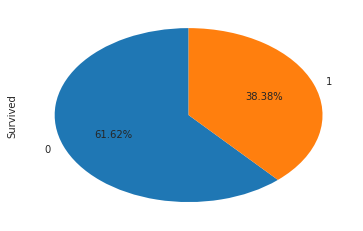

In [37]:
full_data['Survived'].value_counts().plot.pie(labeldistance = 1.1,autopct = '%1.2f%%',
                                               shadow = False,startangle = 90,pctdistance = 0.6)
#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

### 训练机器学习算法

In [56]:
# 第一步导入算法

import warnings
warnings.filterwarnings('ignore')
from time import time
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
def train_predict(learner,  X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    results["model_name"] = learner.__class__.__name__
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner =learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)

    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    

    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] =  fbeta_score(y_test,predictions_test,beta=0.5)
       
   
    # Return the results
    return results

In [57]:
# 第一步导入算法
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model = AdaBoostClassifier()
model.fit( train_X , train_y )
print("AdaBoostClassifier score:  %0.4f " % model.score(test_X , test_y))

AdaBoostClassifier score:  0.8396 


In [58]:
from time import time
clfs = {}

# 0. 贝叶斯
from sklearn.naive_bayes import MultinomialNB
clfs["mnb"] = MultinomialNB()
# 1. 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
clfs["nb"] = GaussianNB()

# 2. 决策树
from sklearn.tree import DecisionTreeClassifier
clfs["dtc"] = DecisionTreeClassifier(random_state=10)

# 3. K近邻 (KNeighbors)
from sklearn.neighbors import KNeighborsClassifier
clfs["knc"] = KNeighborsClassifier()

# 4. 支撑向量机回归(SVC)
from sklearn.svm import SVC
clfs["svc"] = SVC()

# 5. Logistic回归
from sklearn.linear_model import LogisticRegression
clfs['lr'] = LogisticRegression(random_state=10)

# 6. 随机森林
from sklearn.ensemble import RandomForestClassifier
clfs["rfc"] = RandomForestClassifier(random_state=10)

# 7. AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clfs["adc"] = AdaBoostClassifier(random_state=10)

# 8. 梯度提升树GBDT
from sklearn.ensemble import GradientBoostingClassifier
clfs["gbdt"] = GradientBoostingClassifier(random_state=10)



totaldata = pd.DataFrame(columns=['model_name','train_time', 
                                  'pred_time',                
                                  'acc_test', 
                                  'f_test'
                                  ])

for clf in clfs:
    #print(clf)
    # print(clfs[clf])
    temp = train_predict(clfs[clf],train_X, train_y, test_X, test_y)
    rdata = pd.DataFrame(pd.Series(temp)).T
    totaldata=pd.concat([totaldata,rdata])

totaldata.sort_values(by="train_time",ascending=False)


,acc_test,f_test,model_name,pred_time,train_time
0,0.839552,0.765306,AdaBoostClassifier,0.00502825,0.0826483
0,0.847015,0.791855,GradientBoostingClassifier,0.000786543,0.0655518
0,0.656716,0.478142,SVC,0.00873375,0.032769
0,0.820896,0.763547,RandomForestClassifier,0.00121737,0.0176919
0,0.820896,0.746753,LogisticRegression,0.000115395,0.0034368
0,0.720149,0.598086,KNeighborsClassifier,0.00156283,0.00187159
0,0.742537,0.63278,DecisionTreeClassifier,0.0001266,0.00154829
0,0.772388,0.689189,MultinomialNB,9.17912e-05,0.00116062
0,0.824627,0.762911,GaussianNB,0.000182867,0.000667572


####  结论：分数最高为：GradientBoostingClassifier，不过贝叶斯分数不错而且用了更少的时间 

**梯度提升树(GBDT)调参： **

In [62]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(10,101,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=10,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(train_X,train_y)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 50}, 0.85107918367346935)

In [63]:
param_test2 = {'max_depth':range(2,14,2), 'min_samples_split':range(10,101,10)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(train_X,train_y)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 8, 'min_samples_split': 60}, 0.85484299319727897)

In [101]:
param_test3 = {'min_samples_split':range(10,101,10), 'min_samples_leaf':range(10,101,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=8,
                                     max_features='sqrt',  min_samples_split =60,subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(train_X,train_y)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 20, 'min_samples_split': 60}, 0.85484299319727897)

In [102]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=6, min_samples_leaf =20,min_samples_split =10, 
                                  max_features=6, subsample=0.8, random_state=0)
gbm1.fit(train_X,train_y)

print("GradientBoostingClassifier score:  %0.4f " % gbm1.score(test_X , test_y))

GradientBoostingClassifier score:  0.8433 


In [99]:
from sklearn.metrics import accuracy_score

y_pred = gbm1.predict(test_X)

print('Accuracy: %0.4f' % accuracy_score(test_y,y_pred))

Accuracy: 0.8433


** 结果：最后使用梯度提升树得出的准确率为：0.8433  ** 